In [1]:
# Mithil Patel 
# DSC 530 Final Project
# 13th August, 2022

# Importing libraries
import thinkstats2
import numpy as np
import nsfg
import pandas as pd
import statsmodels.formula.api as smf
import thinkplot
import os

import seaborn as sns
import matplotlib.pyplot as plt

AxesSubplot(0.125,0.125;0.62x0.755)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


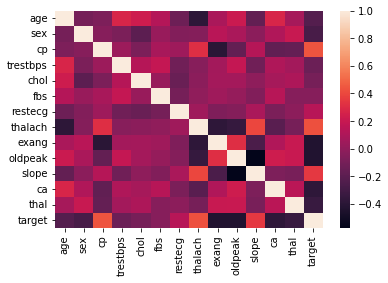

In [2]:
# Setting directory
os.chdir("/Users/Mithil_Patel/Desktop/")

# importing data
dataframe = pd.read_csv("heart.csv")

# Generating a correlation matrix to determine correlation between variables
print(sns.heatmap(dataframe.corr()))
dataframe.corr()

In [3]:
#Checking for empty values
dataframe.isnull().sum().sum()

# Convert oldpeak datatype from float to integer
dataframe[['oldpeak']] = dataframe[['oldpeak']].astype(int)

# Selecting specific columns
df = dataframe[['cp','thalach','exang','oldpeak','slope','target']]

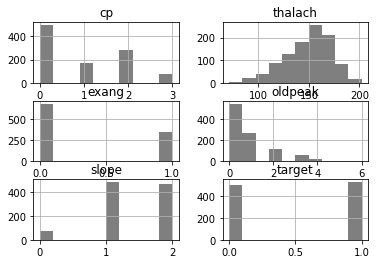

In [4]:
# Display histogram
histo = df.hist(color='k', alpha=0.5, bins=10)

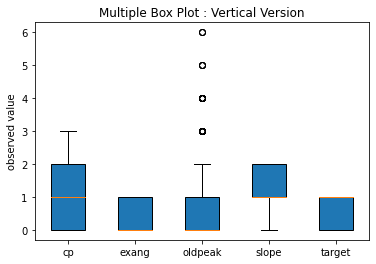

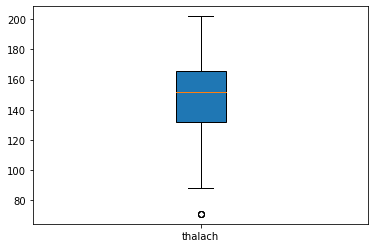

In [5]:
# Plotting boxplots
df_boxplot = dataframe[['cp','exang','oldpeak','slope','target']]
labels = ['cp','exang','oldpeak','slope','target']

plt.boxplot(df_boxplot, vert=True,  patch_artist=True, labels=labels) 
plt.ylabel('observed value')
plt.title('Multiple Box Plot : Vertical Version')
plt.show()

# df.boxplot(column=["thalach"],grid=False)
thalach_plt = plt.boxplot(df["thalach"],vert=True, patch_artist=True, labels=["thalach"])

In [6]:
# Outlier handling by removing rows
columns = ['oldpeak', 'thalach'] # The columns you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df[columns].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df = df[condition]

In [7]:
df.agg(
    {
    'cp': ["min", "max", "median", "skew", "mean"],
    'thalach': ["min", "max", "median", "skew", "mean"],
    'exang': ["min", "max", "median", "skew", "mean"],
    'oldpeak': ["min", "max", "median", "skew", "mean"],
    'slope': ["min", "max", "median", "skew", "mean"],
    'target': ["min", "max", "median", "skew","mean"],
    })

,cp,thalach,exang,oldpeak,slope,target
min,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,202.000000,1.000000,2.000000,2.000000,1.000000
median,1.000000,154.000000,0.000000,0.000000,1.000000,1.000000
skew,0.448170,-0.500627,0.820841,0.933218,-0.495498,-0.222994
mean,0.987111,150.012889,0.310419,0.540279,1.450054,0.555317


In [8]:
df.mode()

,cp,thalach,exang,oldpeak,slope,target
0,0,162,0,0,2,1


In [9]:
# Determining whether chest pain influences heart disease in patients 
no_cardioDisease = df[df.target == 0]
cardioDisease = df[df.target == 1]

no_cardioDisease_pmf = thinkstats2.Pmf(no_cardioDisease.slope, label="No Heart Disease")
cardioDisease_pmf = thinkstats2.Pmf(cardioDisease.slope, label="Heart Disease")

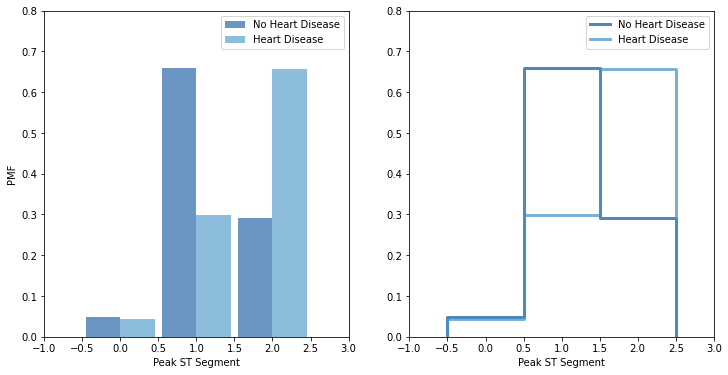

In [10]:
# PMF plot of 'slope' 
width = 0.45
axis = [-1, 3 , 0, 0.8]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(no_cardioDisease_pmf, align="right", width=width)
thinkplot.Hist(cardioDisease_pmf, align="left", width=width)
thinkplot.Config(xlabel="Peak ST Segment", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([no_cardioDisease_pmf, cardioDisease_pmf])
thinkplot.Config(xlabel="Peak ST Segment", axis=axis)

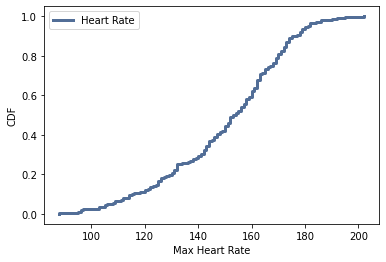

<Figure size 576x432 with 0 Axes>

In [11]:
# Generating a CDF plot with heart rate
cdf = thinkstats2.Cdf(df.thalach, label='Heart Rate')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Max Heart Rate', ylabel='CDF')

n, mean, std 931 150.12267250821466 21.695297583046774


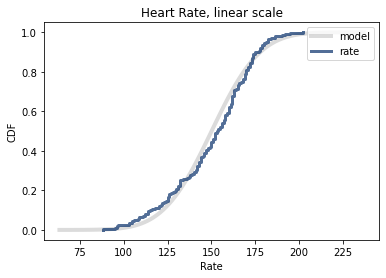

In [12]:
# Analytical distribution
heart_rate = df.thalach

# Normal Distribution
def MakeNormalModel(rate):
    cdf = thinkstats2.Cdf(rate, label="rate")

    mean, var = thinkstats2.TrimmedMeanVar(rate)
    std = np.sqrt(var)
    print("n, mean, std", len(rate), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)

tha = df.thalach
MakeNormalModel(tha)
thinkplot.Config(
    title="Heart Rate, linear scale",
    xlabel="Rate",
    ylabel="CDF",
    loc="upper right",
)

n, mean, std 931 2.171544921343347 0.0666372590288774


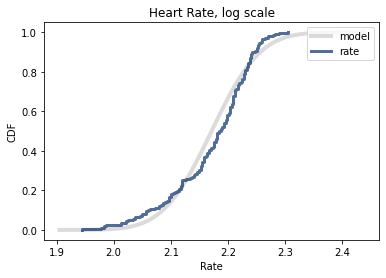

In [13]:
# Lognormal distribution
log_rate = np.log10(heart_rate)
MakeNormalModel(log_rate)
thinkplot.Config(
    title="Heart Rate, log scale",
    xlabel="Rate",
    ylabel="CDF",
    loc="upper right",
)

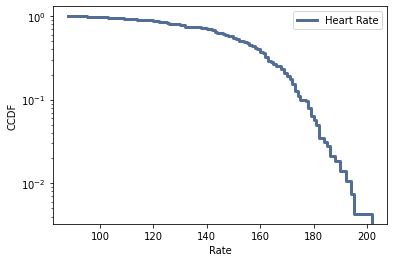

In [14]:
# exponential distribution
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(
    xlabel="Rate",
    ylabel="CCDF",
    yscale="log",
    loc="upper right",
)

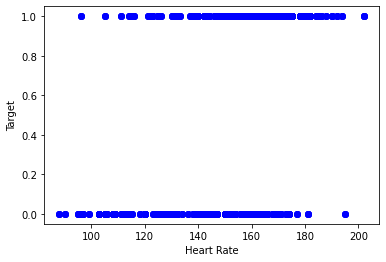

In [15]:
# thalach vs target
plt.scatter(df.thalach, df.target, c ="blue")

plt.xlabel("Heart Rate")
plt.ylabel("Target")
plt.show()

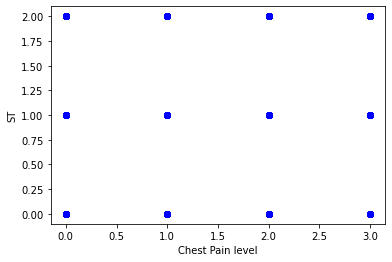

In [16]:
# cp vs slope scatterplot
plt.scatter(df.cp, df.slope, c ="blue")

plt.xlabel("Chest Pain level")
plt.ylabel("ST")
plt.show()

In [17]:
# Testing a correlation between peak exercise ST segment slope and target
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    
data = df.slope, df.target
ht = CorrelationPermute(data)
pvalue = ht.PValue()

spearman_corr = thinkstats2.SpearmanCorr(df.slope, df.target)
correlation = thinkstats2.Corr(df.slope, df.target)
covariance = thinkstats2.Cov(df.slope, df.target)

print(str.format('Correlation test p-value: {0:.2f}', pvalue))
print(f"Correlation: {correlation}\nCovariance: {covariance}\nSpearman correlation: {spearman_corr}")

Correlation test p-value: 0.00
Correlation: 0.3173447791235082
Covariance: 0.09164579393858278
Spearman correlation: 0.34254944616659844


In [24]:
# Correlation statistics for thalach vs target
data = df.thalach, df.target
ht = CorrelationPermute(data)
pvalue = ht.PValue()


spearman_corr = thinkstats2.SpearmanCorr(df.thalach, df.target)
correlation = thinkstats2.Corr(df.thalach, df.target)
covariance = thinkstats2.Cov(df.thalach, df.target)

print(str.format('Correlation test p-value: {0:.2f}', pvalue))
print(f"Correlation: {correlation}\nCovariance: {covariance}\nSpearman correlation: {spearman_corr}")

Correlation test p-value: 0.00
Correlation: 0.4198547147261232
Covariance: 4.746870244508001
Spearman correlation: 0.42095496481139566


In [25]:
# Correlation statistics for cp vs target
data = df.cp, df.target
ht = CorrelationPermute(data)
pvalue = ht.PValue()

spearman_corr = thinkstats2.SpearmanCorr(df.cp, df.target)
correlation = thinkstats2.Corr(df.cp, df.target)
covariance = thinkstats2.Cov(df.cp, df.target)

print(str.format('Correlation test p-value: {0:.2f}', pvalue))
print(f"Correlation: {correlation}\nCovariance: {covariance}\nSpearman correlation: {spearman_corr}")

Correlation test p-value: 0.00
Correlation: 0.42197210606046315
Covariance: 0.2144616566735235
Spearman correlation: 0.44779228370639157


In [26]:
# Correlation statistics for exang vs target
data = df.exang, df.target
ht = CorrelationPermute(data)
pvalue = ht.PValue()

spearman_corr = thinkstats2.SpearmanCorr(df.exang, df.target)
correlation = thinkstats2.Corr(df.exang, df.target)
covariance = thinkstats2.Cov(df.exang, df.target)

print(str.format('Correlation test p-value: {0:.2f}', pvalue))
print(f"Correlation: {correlation}\nCovariance: {covariance}\nSpearman correlation: {spearman_corr}")

Correlation test p-value: 0.00
Correlation: -0.4320823174104473
Covariance: -0.09934111017916138
Spearman correlation: -0.432082317410447


In [27]:
# Correlation statistics for oldpeark vs target
data = df.oldpeak, df.target
ht = CorrelationPermute(data)
pvalue = ht.PValue()

spearman_corr = thinkstats2.SpearmanCorr(df.oldpeak, df.target)
correlation = thinkstats2.Corr(df.oldpeak, df.target)
covariance = thinkstats2.Cov(df.oldpeak, df.target)

print(str.format('Correlation test p-value: {0:.2f}', pvalue))
print(f"Correlation: {correlation}\nCovariance: {covariance}\nSpearman correlation: {spearman_corr}")

Correlation test p-value: 0.00
Correlation: -0.3929062665486184
Covariance: -0.13890911104675907
Spearman correlation: -0.3868584464664501


In [22]:
# Conducting Logistic regression
formula = 'target ~ cp + thalach + exang + oldpeak + slope'
model = smf.logit(formula, data=df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.478913
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  931
Model:                          Logit   Df Residuals:                      925
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Aug 2022   Pseudo R-squ.:                  0.3029
Time:                        06:18:00   Log-Likelihood:                -445.87
converged:                       True   LL-Null:                       -639.61
Covariance Type:            nonrobust   LLR p-value:                 1.476e-81
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2596      0.703     -4.637      0.000      -4.637      -1.882
cp             0.7220      0.088      8.231      0.000       0.550       0.894
thalach        0.0200      0.004      4.529      0.000       0.011       0.029
exang         -1.0794      0.194     -5.575      0.000      -1.459      -0.700
oldpeak       -0.7769      0.143     -5.438      0.000      -1.057      -0.497
slope          0.3684      0.166      2.213      0.027       0.042       0.695
==============================================================================
"""